# **Brain Tumor Project**
- **Implemented By Using DeepLearning**
  - **Keras**
  - **Tensorflow**

In [2]:
## Required Libraries For the model
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPool2D,Dropout, BatchNormalization, GlobalAvgPool2D, Conv2D
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img, ImageDataGenerator
import os
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

In [3]:
## load the data
data_dir = ('/content/drive/MyDrive/tumor')
number_of_img=['jpeg','jpg','bmp','png']

In [4]:
## total images in tumor and no tumor

tumor_len = len(os.listdir(os.path.join(data_dir,"meningioma")))
notumor_len = len(os.listdir(os.path.join(data_dir,"notumor")))
print("Total Tumor Images: ", tumor_len)
print("Total No_Tumor Images: ", notumor_len)

Total Tumor Images:  1339
Total No_Tumor Images:  1595


In [5]:
for image_class in os.listdir(data_dir):   ## it reads two files that is meningioma and notumor directory
    for image in os.listdir(os.path.join(data_dir, image_class)):  ## reads the all images tomur and notumor(1339+1595) images
        image_path = os.path.join(data_dir, image_class, image)
        try :
            img = cv2.imread(image_path)  ## cv2 reads and loads the image specified field
            tip = imghdr.what(image_path) ## determine type image inthe byte stream
            if tip not in image_exts:
                print("Image not in exists list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))

Issue with image /content/drive/MyDrive/tumor/notumor/Tr-no_0421.jpg
Issue with image /content/drive/MyDrive/tumor/notumor/Tr-no_0839.jpg
Issue with image /content/drive/MyDrive/tumor/notumor/Tr-no_0549.jpg
Issue with image /content/drive/MyDrive/tumor/notumor/Tr-no_0745.jpg
Issue with image /content/drive/MyDrive/tumor/notumor/Tr-no_0746.jpg
Issue with image /content/drive/MyDrive/tumor/notumor/Tr-no_0615.jpg
Issue with image /content/drive/MyDrive/tumor/notumor/Tr-no_0890.jpg
Issue with image /content/drive/MyDrive/tumor/notumor/Tr-no_0758.jpg
Issue with image /content/drive/MyDrive/tumor/notumor/Tr-no_0551.jpg
Issue with image /content/drive/MyDrive/tumor/notumor/Tr-no_0359.jpg
Issue with image /content/drive/MyDrive/tumor/notumor/Tr-no_0666.jpg
Issue with image /content/drive/MyDrive/tumor/notumor/Tr-no_0420.jpg
Issue with image /content/drive/MyDrive/tumor/notumor/Tr-no_0687.jpg
Issue with image /content/drive/MyDrive/tumor/notumor/Tr-no_1049.jpg
Issue with image /content/drive/My

In [6]:
data = tf.keras.utils.image_dataset_from_directory(directory='/content/drive/MyDrive/tumor',
                                                   image_size=(224,224),
                                                   batch_size=32,
                                                   label_mode='binary')
## scale data in rgb of 255
data_scale = data.map(lambda x,y: (x/255, y))
data_iterator = data_scale.as_numpy_iterator()
batch  = data_iterator.next()
print("Image shape: ",batch[0].shape)
print("Labels shape: ",batch[1].shape)

Found 2934 files belonging to 2 classes.
Image shape:  (32, 224, 224, 3)
Labels shape:  (32, 1)


### **Split Data Train, Validation, and Test**

In [7]:
train = data = tf.keras.utils.image_dataset_from_directory(directory='/content/drive/MyDrive/tumor',
                                                   image_size=(224,224),
                                                   batch_size=32,
                                                   label_mode='binary',
                                                   seed=123,
                                                   validation_split=0.2,
                                                   subset='training',
                                                   shuffle=True)
train_scale = train.map(lambda x,y: (x/255, y))
train_iterator = train_scale.as_numpy_iterator()
batch  = train_iterator.next()
print("Image shape: ",batch[0].shape)
print("Labels shape: ",batch[1].shape)


Found 2934 files belonging to 2 classes.
Using 2348 files for training.
Image shape:  (32, 224, 224, 3)
Labels shape:  (32, 1)


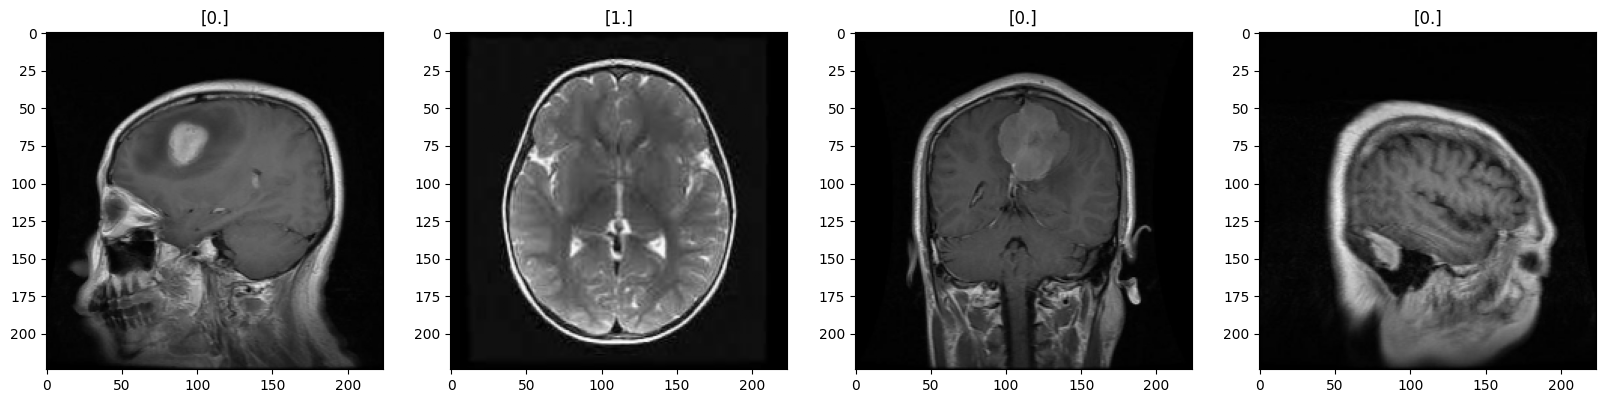

In [8]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

- 0 = Brain Tumor
- 1 = No Tumor

In [9]:
val = tf.keras.utils.image_dataset_from_directory(directory="/content/drive/MyDrive/tumor",
                                                  validation_split=0.15,
                                                  batch_size=32,
                                                  image_size=(224,224),
                                                  seed=123,
                                                  subset='validation',
                                                  label_mode='binary')
val_scale = val.map(lambda x,y: (x/255,y))
val_iter = val_scale.as_numpy_iterator()
batch = val_iter.next()
print("Image shape", batch[0].shape)
print("Labels shape", batch[1].shape)


Found 2934 files belonging to 2 classes.
Using 440 files for validation.
Image shape (32, 224, 224, 3)
Labels shape (32, 1)


In [10]:
test = int(len(data)*0.15)
test = data.take(test)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

**Model Building**

In [12]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
model_earlystop = EarlyStopping(monitor='accuracy', min_delta=0.01, patience=8, verbose=1, mode='auto')
## Feature Extraction In CNN
## froming model into Sequential
model = Sequential()

## Now adding model required filters, kernel_size, activation, input_shape
## input layers
model.add(Conv2D(filters=30, kernel_size=(3,3), activation='relu', input_shape=(224,224,3))) ## input layer

## Hidden layer
model.add(Conv2D(filters=50, kernel_size=(3,3), activation='relu')) ## hidden layer 1
model.add(MaxPool2D(pool_size=(2,2))) ## MaxPool2D which down samples the input along its height and weight

model.add(Conv2D(filters=80, kernel_size=(3,3), activation='relu')) ## hidden layer 2
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=120, kernel_size=(3,3), activation='relu')) ## hidden layer 3
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten()) ##convert the 2D array into 1D array

## classification and Probabilistic Distribution or output layers
model.add(Dense(units=40, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=1, activation='sigmoid'))

## model.compile
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
hist = model.fit(train, epochs=30, validation_data = val, validation_split=0.2, initial_epoch=3, callbacks=model_earlystop)

Epoch 4/30
74/74 [==============================] - 32s 255ms/step - loss: 0.9532 - accuracy: 0.8641 - val_loss: 0.2072 - val_accuracy: 0.9386
Epoch 5/30
74/74 [==============================] - 17s 214ms/step - loss: 0.1886 - accuracy: 0.9323 - val_loss: 0.1857 - val_accuracy: 0.9432
Epoch 6/30
74/74 [==============================] - 16s 200ms/step - loss: 0.1355 - accuracy: 0.9527 - val_loss: 0.1372 - val_accuracy: 0.9591
Epoch 7/30
74/74 [==============================] - 16s 201ms/step - loss: 0.1022 - accuracy: 0.9617 - val_loss: 0.1379 - val_accuracy: 0.9591
Epoch 8/30
74/74 [==============================] - 16s 203ms/step - loss: 0.0699 - accuracy: 0.9719 - val_loss: 0.1546 - val_accuracy: 0.9614
Epoch 9/30
74/74 [==============================] - 16s 204ms/step - loss: 0.0815 - accuracy: 0.9710 - val_loss: 0.1913 - val_accuracy: 0.9682
Epoch 10/30
74/74 [==============================] - 16s 207ms/step - loss: 0.0578 - accuracy: 0.9804 - val_loss: 0.1818 - val_accuracy: 0.970

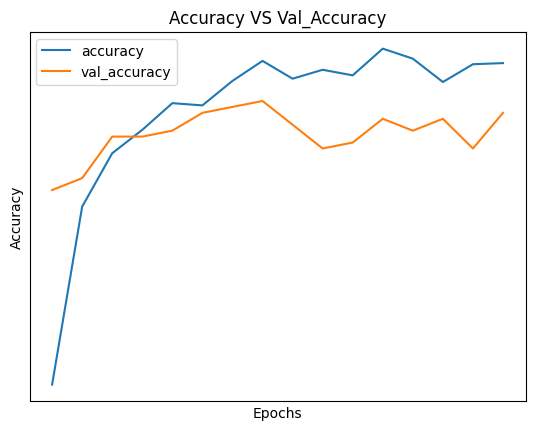

In [16]:
## plot accuracy and val_accuracy
fig = plt.figure()
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.title("Accuracy VS Val_Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks([])
plt.yticks([])
#plt.ylim([0.5,1.0])
plt.legend()
plt.show()

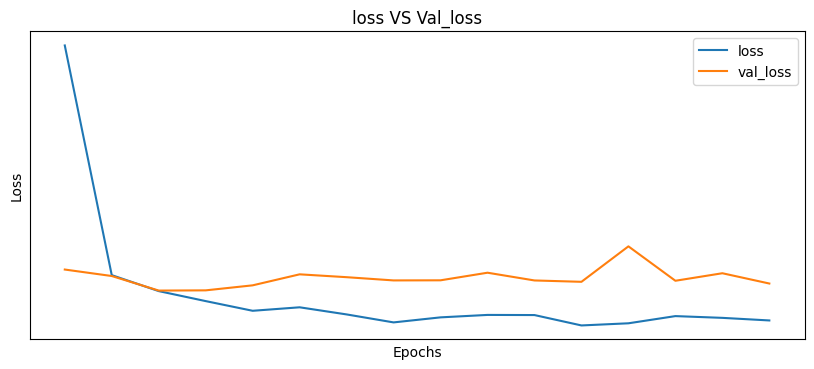

In [20]:
## plot loss and val_loss
plt.figure(figsize=(10,4))
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.title("loss VS Val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks([])
plt.yticks([])
#plt.ylim()
plt.legend()
plt.show()

# **Model Tuner**

In [22]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 4.4 MB/s eta 0:00:00


In [23]:
## tuner library
import keras_tuner
import keras
from kerastuner import RandomSearch

In [24]:
## function to create hyperparameter to find best model
def build_model2(hp):
  model = keras.Sequential(
      [keras.layers.Conv2D(
           filters = hp.Int('conv_1_filter', min_value=15, max_value=80, step=16),
           kernel_size = hp.Choice('conv_1_kernel', values=[2,5]),
           activation='relu',
           input_shape = (224,224,3)
       ),
       keras.layers.Conv2D(
           filters = hp.Int('conv_2_filter', min_value=30, max_value=100, step=16),
           kernel_size = hp.Choice('conv_2_kernel', values=[2,5]),
           activation='relu'
       ),
       keras.layers.MaxPool2D(pool_size = (2,2)),
       keras.layers.Dropout(rate = hp.Float('dropout', 0.3,0.5)),
       keras.layers.Conv2D(
           filters=hp.Int('conv_3_filter', min_value=80, max_value=200, step=32),
           kernel_size=hp.Choice('conv_3_kernel', values=[2,5]),
           activation='relu'
       ),
       keras.layers.MaxPool2D(pool_size = (2,2)),
       keras.layers.Dropout(rate = hp.Float('dropout', 0.3,0.5)),
       keras.layers.Flatten(),
       keras.layers.Dense(
           units = hp.Int('Dense_units', min_value=80, max_value=200, step=32),
           activation='relu'
       ),
       keras.layers.Dropout(rate = hp.Float('dropout', 0.3,0.5)),
       keras.layers.Dense(units=1, activation='sigmoid')])
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-3, 1e-4])),
                loss = keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])
  return model

In [25]:
## using RandomSearch to select the best model using hypertuned model
tuner = RandomSearch(hypermodel=build_model2, objective='val_accuracy', max_trials=3, directory='output-4', project_name='Brain_Tumor_MRI')
## search the best model
tuner.search(train, epochs=5, validation_data=val, validation_split=0.2)

Trial 3 Complete [00h 02m 49s]
val_accuracy: 0.949999988079071

Best val_accuracy So Far: 0.949999988079071
Total elapsed time: 00h 07m 23s


In [26]:
## select the best model in which we have tuned before
best_model = tuner.get_best_models()[0]

In [27]:
## Early Stopping if there is no improvement model accuracy model get stopped
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
model_earlystop = EarlyStopping(monitor='accuracy', min_delta=0.01, patience=8, verbose=1, mode='auto')

## model fit
model_train2 = best_model.fit(train, epochs=30, validation_data = val, validation_split=0.2, initial_epoch=3, callbacks=model_earlystop)

Epoch 4/30
74/74 [==============================] - 24s 274ms/step - loss: 0.2491 - accuracy: 0.9003 - val_loss: 0.2386 - val_accuracy: 0.9523
Epoch 5/30
74/74 [==============================] - 22s 280ms/step - loss: 0.2213 - accuracy: 0.9080 - val_loss: 0.2127 - val_accuracy: 0.9545
Epoch 6/30
74/74 [==============================] - 21s 276ms/step - loss: 0.1949 - accuracy: 0.9229 - val_loss: 0.2219 - val_accuracy: 0.9500
Epoch 7/30
74/74 [==============================] - 22s 293ms/step - loss: 0.1743 - accuracy: 0.9289 - val_loss: 0.2225 - val_accuracy: 0.9114
Epoch 8/30
74/74 [==============================] - 23s 296ms/step - loss: 0.1557 - accuracy: 0.9395 - val_loss: 0.1525 - val_accuracy: 0.9545
Epoch 9/30
74/74 [==============================] - 21s 274ms/step - loss: 0.1337 - accuracy: 0.9476 - val_loss: 0.1258 - val_accuracy: 0.9591
Epoch 10/30
74/74 [==============================] - 36s 479ms/step - loss: 0.1247 - accuracy: 0.9497 - val_loss: 0.1430 - val_accuracy: 0.952

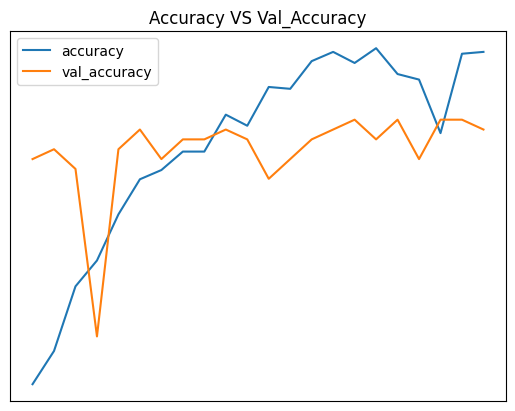

In [28]:
## check the accuracy and val_accuracy using hypertuned model
fig = plt.figure()
plt.plot(model_train2.history['accuracy'], label='accuracy')
plt.plot(model_train2.history['val_accuracy'], label='val_accuracy')
plt.title("Accuracy VS Val_Accuracy")
plt.xticks([])
plt.yticks([])
plt.legend()
plt.show()

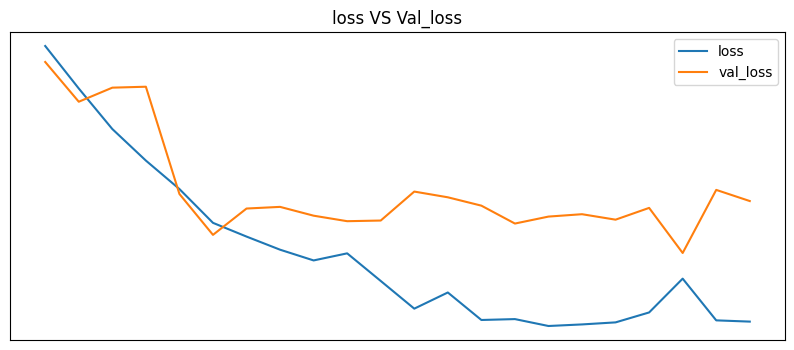

In [29]:
## check the loss and val_loss using hypertuned model
plt.figure(figsize=(10,4))
plt.plot(model_train2.history['loss'], label='loss')
plt.plot(model_train2.history['val_loss'], label='val_loss')
plt.title("loss VS Val_loss")
plt.xticks([])
plt.yticks([])
plt.legend()
plt.show()

- **Comparing To Previous Plot Where We have took Manual Parameters Looking Into the plot we are getting Overfit**
- **After Selecting HyperTuned Model Parameters we are getting Good Plot**

In [30]:
## model accuracy using test data
from keras.models import load_model
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
precision = Precision()
recall = Recall()
BinaryAcc = BinaryAccuracy()

In [55]:
##check accuracy
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat = best_model.predict(X)
  precision.update_state(y, yhat)
  recall.update_state(y, yhat)
  BinaryAcc.update_state(y,yhat)
print(precision.result(),"\n",recall.result(),"\n",BinaryAcc.result())

1/1 [==============================] - 0s 36ms/step
tf.Tensor(1.0, shape=(), dtype=float32) 
 tf.Tensor(1.0, shape=(), dtype=float32) 
 tf.Tensor(1.0, shape=(), dtype=float32)


1/1 [==============================] - 0s 111ms/step
Brain Tumor


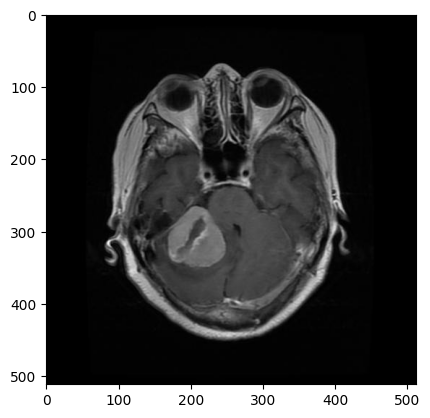

In [51]:
import cv2
path = "/content/drive/MyDrive/tumor/meningioma/Tr-me_0022.jpg"
img = cv2.imread(path)
resize = tf.image.resize(img, (224,224))
plt.imshow(img)
input_expand = np.expand_dims(resize/255, axis=0)
pred = best_model.predict(input_expand)[0][0]
if pred>=0.5:
  print("No Tumor")
else:
  print("Brain Tumor")